## Easy

1. How many unique customers are in the dataset?

2. What are the different categories of products available? How many unique categories are there?

3. Which payment method is the most popular? How many times was it used?

In [200]:
import pandas as pd
invoice_data = pd.read_csv("/Users/amandaprats/Downloads/School/Ateneo/Second Year/intersession 24-25/ITMGT/sales data/fct_invoice.csv")

customer_data = pd.read_json('/Users/amandaprats/Downloads/School/Ateneo/Second Year/intersession 24-25/ITMGT/sales data/dim_customer.json')

invoice_data.head(), customer_data.head()

(  invoice_no  customer_id  category  quantity    price payment_method invoice_date   shopping_mall
 0    I138884          229  Clothing         5  1500.40    Credit Card     5/8/2022          Kanyon
 1    I317333         3433     Shoes         3  1800.51     Debit Card   12/12/2021  Forum Istanbul
 2    I127801          644  Clothing         1   300.08           Cash    9/11/2021       Metrocity
 3    I173702         4900     Shoes         5  3000.85    Credit Card   16/05/2021    Metropol AVM
 4    I337046         1089     Books         4    60.60           Cash   24/10/2021          Kanyon,
     age first_name gender  id last_name
 0  48.0   Nicholas      M   0    Flores
 1   NaN    Jeffery      M   1      Rowe
 2  57.0     Alexis      F   2    Benton
 3  73.0        Amy      F   3   Johnson
 4  20.0      David      M   4     Moore)

In [30]:
#1. How many unique customers are in the dataset?
unique_customers = customer_data['id'].nunique()
unique_customers

5191

In [70]:
#2. What are the different categories of products available? How many unique categories are there?
unique_categories = invoice_data['category'].unique()
unique_categories_str = ', '.join(unique_categories)

numunique_products = invoice_data['category'].nunique
numunique_products = len(invoice_data['category'].unique())


print("the unique categories are:", unique_categories_str)
print("there are", numunique_products, "unique categories")

the unique categories are: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir
there are 8 unique products


In [98]:
#3. Which payment method is the most popular? How many times was it used?

popular_payment_method = invoice_data['payment_method'].value_counts()
most_popular_payment_method = popular_payment_method.idxmax()

print("The most popular payment method is", most_popular_payment_method)

times_used = invoice_data['payment_method'].value_counts().max()
print("It was used", times_used, "times")

the most popular payment method is Cash
It was used 44447 times


## Medium
1. What are the three most popular categories, by total sales?

2. What are the total sales attributed to customers over the age of 45?

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)



In [128]:
#1. What are the three most popular categories, by total sales?
invoice_data['total_sales'] = invoice_data['quantity'] * invoice_data['price']

descending_categ = invoice_data.groupby('category')['total_sales'].sum().sort_values(ascending=False)
three_popular_categ = descending_categ.head(3)
 
#convert to a df
three_popular_categ_df = three_popular_categ.reset_index()
three_popular_categ_df.columns = ['Category', 'Total Sales']

three_popular_categ_df

,Category,Total Sales
0,Clothing,1.139968e+08
1,Shoes,6.655345e+07
2,Technology,5.786235e+07


In [149]:
#2. What are the total sales attributed to customers over the age of 45?
merge_data = pd.merge(invoice_data, customer_data, left_on='customer_id', right_on='id')

over_45_customers = merge_data[merge_data['age'] > 45]

total_sales_over_45 = over_45_customers['total_sales'].sum()

#it looked ugly hehe
formatted_total_sales_over_45 = f"{total_sales_over_45:,.2f}"

print("The total sales attributed to customers over the age of 45 is", formatted_total_sales_over_45)

The total sales attributed to customers over the age of 45 is 82,039,768.15


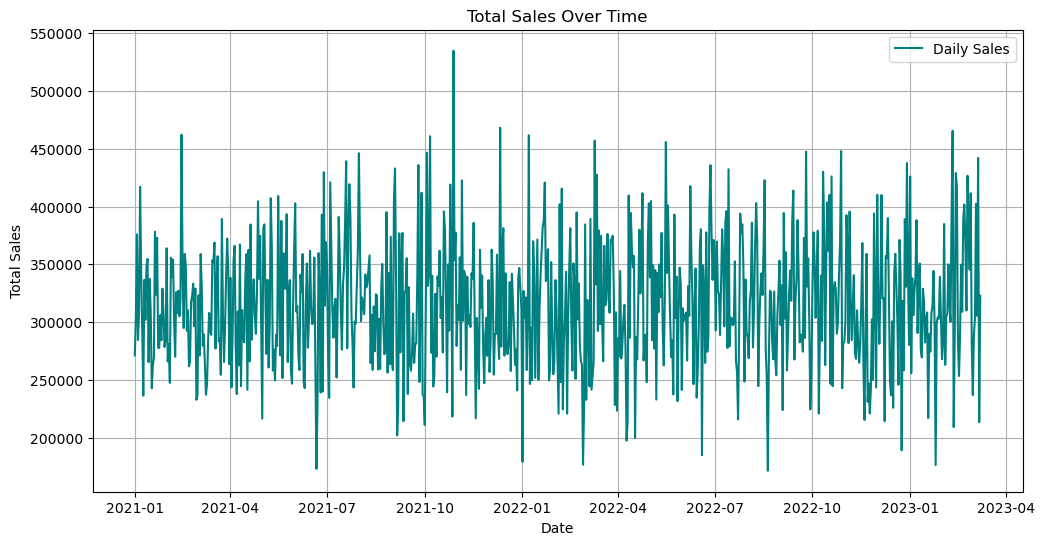

In [163]:
import matplotlib.pyplot as plt

# Convert 'invoice_date' to datetime
invoice_data['invoice_date'] = pd.to_datetime(invoice_data['invoice_date'], dayfirst=True)

daily_sales = invoice_data.groupby('invoice_date')['total_sales'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', color='teal')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).


In [198]:
# drop rows where age is NaN
merged_data = merge_data.dropna(subset=['age'])

# new column for decade age range
merged_data['age_range'] = (merged_data['age'] // 10 * 10).astype(int).astype(str) + 's'

# pivot table
pivot_table = pd.pivot_table(
    data=merged_data,
    index='category',
    columns='age_range',
    values='total_sales',
    aggfunc='sum',
    fill_value=0
)

pd.set_option('display.max_columns', None)


print(pivot_table) 

age_range               10s          20s          30s          40s          50s          60s         70s         80s
category                                                                                                            
Books              12801.75     79461.75     84143.10     87203.40     74962.20     80476.80    54827.85    26664.00
Clothing         1927413.84  10250732.80  11354126.96  11215189.92  10321851.76  10660642.08  7769371.28  4493698.00
Cosmetics         109619.36    605915.32    723544.70    665034.96    587780.96    649990.76   419082.62   254531.60
Food & Beverage    13582.31     73491.96     87246.86     89553.29     72425.04     80976.09    55050.98    31332.93
Shoes             993281.35   5924878.24   7200839.66   7025590.02   5852857.84   5978893.54  4480269.05  2628744.60
Souvenir           12375.15     54943.32     64092.72     66391.80     54943.32     55025.43    38673.81    23718.06
Technology       1129800.00   5261550.00   6159300.00   5954550.